In [1]:
# Import our dependencies
import pandas as pd
import matplotlib as plt
from sklearn.datasets import make_blobs
import sklearn as skl
import tensorflow as tf

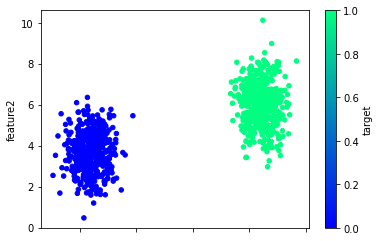

In [2]:
#generate synthetic dataset
X, y = make_blobs(n_samples=1000, centers=2, n_features=2, random_state=78)

#create a df with the syn dataset
df= pd.DataFrame(X, columns=['feature1', 'feature2'])
df['target'] = y

#plot the syn data
df.plot.scatter(x='feature1', y='feature2', c='target', colormap='winter')

In [3]:
#split data into training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [4]:
#prep data for the model by scaling
from sklearn.preprocessing import StandardScaler
#create the scaler instance
scaler = StandardScaler()

#fit the scaler
X_scaler = scaler.fit(X_train)

#scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [5]:
#create the keras sequential model
nm_model = tf.keras.models.Sequential()


In [6]:
#add the first Dense layer, including the input layer
  #first layer and input layer are always built in the same instance
  #input dim will be 2 since there are 2 inputs (clusters?)
  #units - the # of neurons we want in the hidden layer,
  #activation funct will be ReLU to allow the hidden layer to identify and train on nonlinear relationships
nm_model.add(tf.keras.layers.Dense(units=1, activation='relu', input_dim=2))

In [7]:
#add the output layer
  #want binary classification so spec units (# of neurons) as 1
  #use the sigmoid activation function to produce a probability output
nm_model.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [8]:
#check the structure of the sequential model with a summary
nm_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 3         
                                                                 
 dense_1 (Dense)             (None, 1)                 2         
                                                                 
Total params: 5
Trainable params: 5
Non-trainable params: 0
_________________________________________________________________


In [9]:
#compile the sequential model together and customize metrics
  #using binary_crossentropy for loss metric bc it was made for binary classigication
  #using optimizer function adam bc it uses a gradient approach to ensure the alg will 
    #not get stuck on weaker classifying features
  #using accuracy eval metric bc thats what you use for classification,
    #the higher the accuracy number the better

nm_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [10]:
#fit the model to the training data with 100 epochs since thats about how 
  #many it too in the tensorFlow playground tests
fit_model = nm_model.fit(X_train_scaled, y_train, epochs=100)

Epoch 1/100
24/24 [==============================] - 1s 3ms/step - loss: 0.7530 - accuracy: 0.2667
Epoch 2/100
24/24 [==============================] - 0s 2ms/step - loss: 0.7434 - accuracy: 0.2800
Epoch 3/100
24/24 [==============================] - 0s 4ms/step - loss: 0.7352 - accuracy: 0.3187
Epoch 4/100
24/24 [==============================] - 0s 3ms/step - loss: 0.7283 - accuracy: 0.3560
Epoch 5/100
24/24 [==============================] - 0s 2ms/step - loss: 0.7226 - accuracy: 0.3747
Epoch 6/100
24/24 [==============================] - 0s 2ms/step - loss: 0.7178 - accuracy: 0.3973
Epoch 7/100
24/24 [==============================] - 0s 3ms/step - loss: 0.7134 - accuracy: 0.4160
Epoch 8/100
24/24 [==============================] - 0s 3ms/step - loss: 0.7097 - accuracy: 0.4307
Epoch 9/100
24/24 [==============================] - 0s 3ms/step - loss: 0.7063 - accuracy: 0.4533
Epoch 10/100
24/24 [==============================] - 0s 3ms/step - loss: 0.7034 - accuracy: 0.4720
Epoch 11/

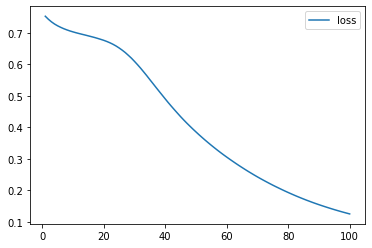

In [14]:
#visualize the loss and accuracy metrics across all epochs
#create a df containing the training history that is stored in the model obj
history_df = pd.DataFrame(fit_model.history, index=range(1,len(fit_model.history["loss"])+1))

#plot the loss
history_df.plot(y="loss")

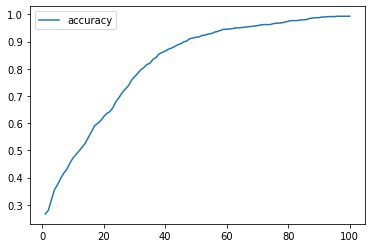

In [15]:
# Plot the accuracy
history_df.plot(y="accuracy")

In [16]:
#evaluate the model using the test data
model_loss, model_accuracy = nm_model.evaluate(X_test_scaled, y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

8/8 - 0s - loss: 0.1219 - accuracy: 0.9960 - 237ms/epoch - 30ms/step
Loss: 0.12191000580787659, Accuracy: 0.9959999918937683


In [18]:
#use the model to predict the classification of a new blob dataset
new_X, new_y = make_blobs(n_samples=10, centers=2, n_features=2, random_state=78)

#scale the new x data
new_X_scaled = X_scaler.transform(new_X)
(nm_model.predict(new_X_scaled) > 0.5).astype("int32")

array([[0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0]], dtype=int32)